# MACHINE LEARNING PROJECT -"GDP DATASET"


The task is to apply machine learning techniques such as linear and logistic regression,decision tree classifier etc on the gdp dataset of different countries and their features to find meaningful results.

Nmae-Harshit Nagpal(18csu080)

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics


df = pd.read_csv('countries of the world.csv', decimal=',')
data=df.copy()
data=data.drop(['GDP ($ per capita)'], axis=1)
data['Phones (per 1000)'].fillna((df['Phones (per 1000)'].mean()), inplace=True)

X=data.iloc[:,9]
X=X.to_frame()

df['GDP ($ per capita)'].fillna((df['GDP ($ per capita)'].mean()), inplace=True)
Y=df.iloc[:, 8]
Y=Y.to_frame()


In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    227 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

In [6]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,227.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10026.881258,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5600.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


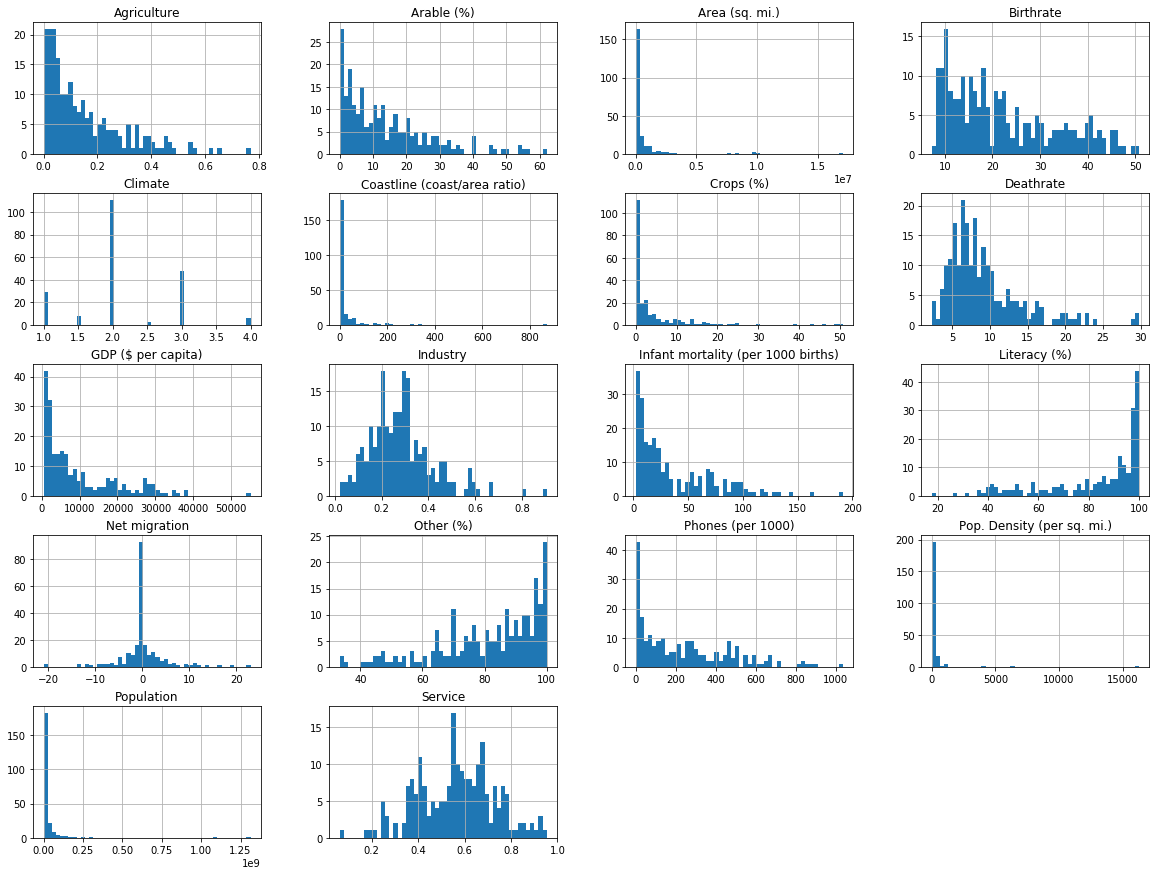

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15));

A few of the histograms are standardized ad some are not as some of them are left tailed and some of them are right tailed.
This data will be standardized further in to the project using standard scalar.

# Data visualization and analysis

HEATMAP

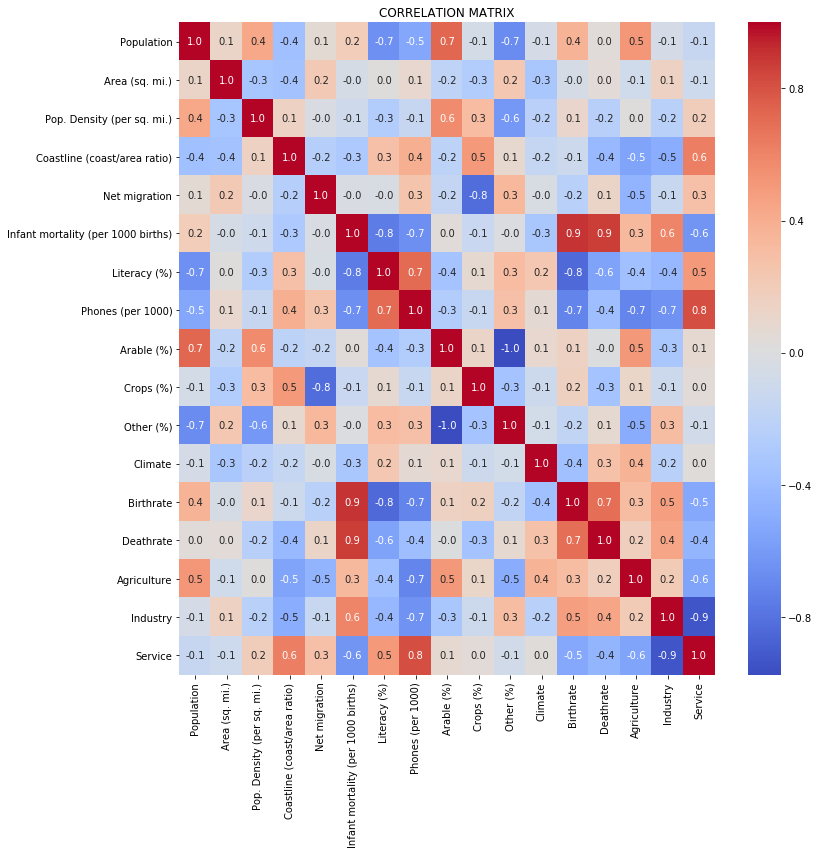

In [8]:
plt.figure(figsize=(12,12))    
ax = plt.axes()
sns.heatmap(data=data.iloc[2:18].corr(),annot=True,cmap='coolwarm',fmt='.1f')
ax.set_title('CORRELATION MATRIX')

plt.show() 

correlation between service and phones per 1000 is- 0.6839341196035671


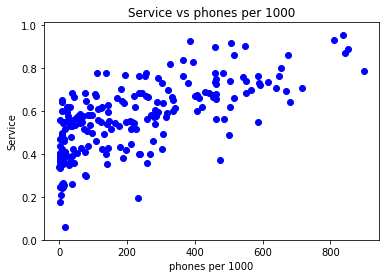

In [9]:
plt.scatter(data['Phones (per 1000)'],data['Service'],color='blue')
plt.title("Service vs phones per 1000")
plt.xlabel("phones per 1000")
plt.ylabel("Service")
print("correlation between service and phones per 1000 is-",df['Service'].corr(df['Phones (per 1000)']))

This scaatter plot shows that service and phones per 1000 are highly correlated with around 70% correlation.This is obvious as the countr with good service and infrastructure will have more cellular companies and thus more phones per 1000 people.

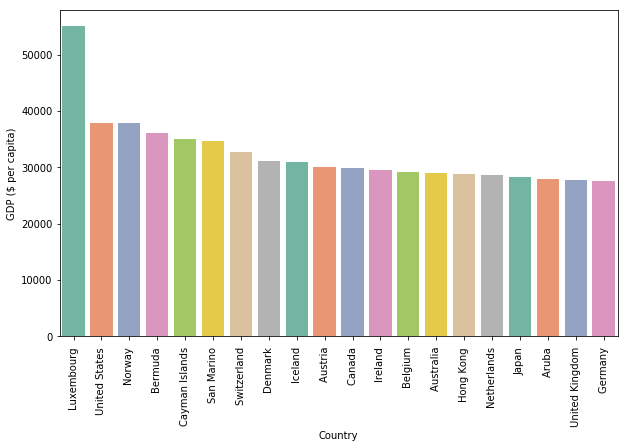

In [10]:
fig = plt.subplots(figsize=(10,6)) 
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False).head(20) 
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries, palette='Set2')
plt.xticks(rotation=90) 
plt.show()

This barplot shows that luxembourg, a small country in europe has the highest gdp in the world of $60000 per capita followed by united states and norway.

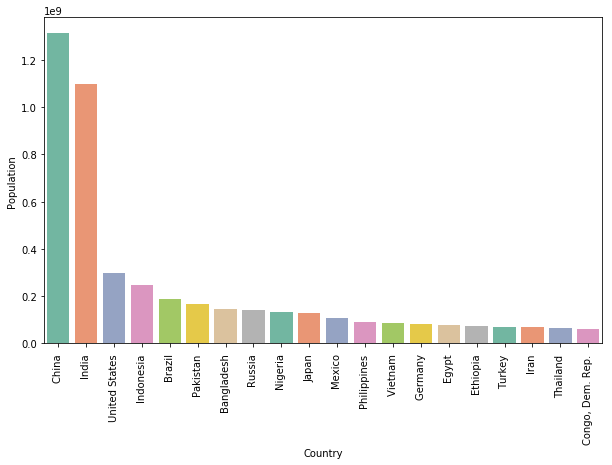

In [61]:
fig = plt.subplots(figsize=(10,6)) 
top_gdp_countries = df.sort_values('Population',ascending=False).head(20) 
sns.barplot(x='Country', y='Population', data=top_gdp_countries, palette='Set2')
plt.xticks(rotation=90) 
plt.show()


This Barplot shows that china,india,US are the three most populous countries of the world.

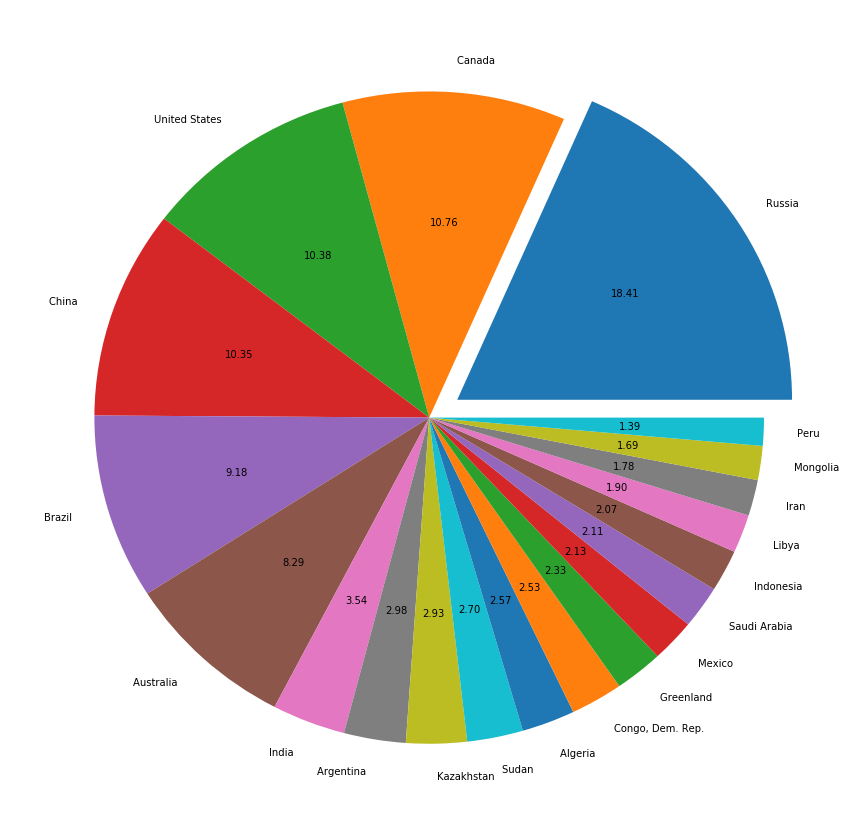

In [59]:
top_gdp_countries = df.sort_values('Area (sq. mi.)',ascending=False).head(20)
labels=top_gdp_countries['Country']
sizes=top_gdp_countries['Area (sq. mi.)']
plt.figure(figsize=(15,15)) 
explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(sizes, labels=labels,autopct='%.2f',explode=explode, textprops={'fontsize': 10})
plt.show()

This is a simple pie chart which shows the top 20 countries by their area.Russia is the biggest country while india is the 7th largest.